In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import joblib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [366]:
bikes=pd.read_csv('bikes.csv')
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [367]:
bikes.describe()

,model_year,price
count,7857.000000,7.857000e+03
mean,2015.367698,1.067913e+05
std,4.001443,1.389261e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


In [368]:
bikes.shape

(7857, 8)

In [369]:
bikes.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

In [370]:
bikes["mileage"].str.strip()

0       35 kmpl
1       35 kmpl
2       30 kmpl
3        28 Kms
4              
         ...   
7852    42 kmpl
7853    80 Kmpl
7854    65 kmpl
7855    57 kmpl
7856    38 kmpl
Name: mileage, Length: 7857, dtype: object

# Preprocessing Dataset

Mileage columns

In [371]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [372]:
bikes["mileage"]= bikes["mileage"].str.strip()

In [373]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,,30 bhp,197500


In [374]:
bikes["mileage"] = bikes["mileage"].str.replace(" kmpl", "")

In [375]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,,30 bhp,197500


In [376]:
bikes["mileage"]=bikes["mileage"].apply(lambda x: x[:2] if isinstance(x, str) else x)

In [377]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,,30 bhp,197500


In [378]:
bikes["mileage"] = bikes["mileage"].astype(int, errors='ignore')

In [379]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,,30 bhp,197500


In [380]:
bikes.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

In [381]:
# Mileage colmn values reflected as string, converting to numeric
bikes["mileage"]=pd.to_numeric(bikes["mileage"].astype(int, errors='ignore').values, errors='coerce')

In [382]:
bikes.dtypes

model_name     object
model_year      int64
kms_driven     object
owner          object
location       object
mileage       float64
power          object
price           int64
dtype: object

In [383]:
bikes.describe()

,model_year,mileage,price
count,7857.000000,7083.000000,7.857000e+03
mean,2015.367698,44.168855,1.067913e+05
std,4.001443,16.531119,1.389261e+05
min,1950.000000,5.000000,0.000000e+00
25%,2014.000000,35.000000,4.200000e+04
50%,2016.000000,40.000000,7.500000e+04
75%,2018.000000,57.000000,1.250000e+05
max,2021.000000,96.000000,3.000000e+06


In [401]:
bikes[bikes["model_name"].str.contains("Jawa")].head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
4,Jawa Perak 330cc 2020,2020,2000 Km,1,bangalore,NaN,30 bhp,197500
157,Jawa Forty Two 295CC 2019,2019,4930 Km,1,moradabad,NaN,27 bhp,140000
211,Jawa Forty Two 295CC Dual ABS BS6 2020,2020,5000 Km,1,pune,NaN,27 bhp,190000
300,Jawa Forty Two 295CC 2019,2019,600 Km,1,ludhiana,NaN,27 bhp,162000
347,Jawa Forty Two 295CC 2019,2019,3200 Km,1,ghaziabad,NaN,27 bhp,160000


In [384]:
bikes[bikes["mileage"] == "Li"]

,model_name,model_year,kms_driven,owner,location,mileage,power,price


In [385]:
bikes.describe()

,model_year,mileage,price
count,7857.000000,7083.000000,7.857000e+03
mean,2015.367698,44.168855,1.067913e+05
std,4.001443,16.531119,1.389261e+05
min,1950.000000,5.000000,0.000000e+00
25%,2014.000000,35.000000,4.200000e+04
50%,2016.000000,40.000000,7.500000e+04
75%,2018.000000,57.000000,1.250000e+05
max,2021.000000,96.000000,3.000000e+06


In [386]:
bikes["owner"].replace({"first owner": 1, "second owner": 2, "third owner": 3, "fourth owner or more": 4}, inplace=True)

In [387]:
bikes["owner"].unique()

array([1, 3, 2, 4])

In [388]:
bikes.nunique()

model_name    1724
model_year      36
kms_driven    1801
owner            4
location       561
mileage         65
power          272
price         1627
dtype: int64

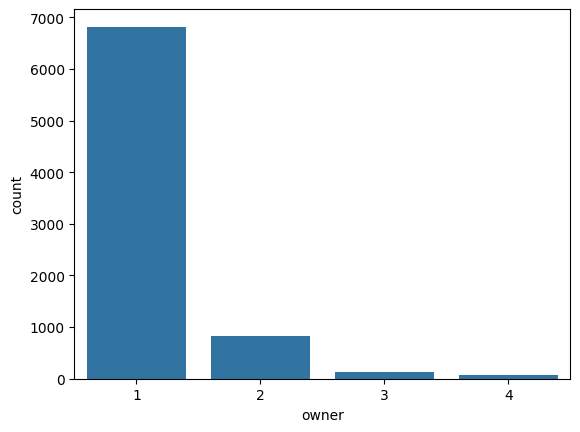

In [389]:
sns.countplot(x="owner", data=bikes);

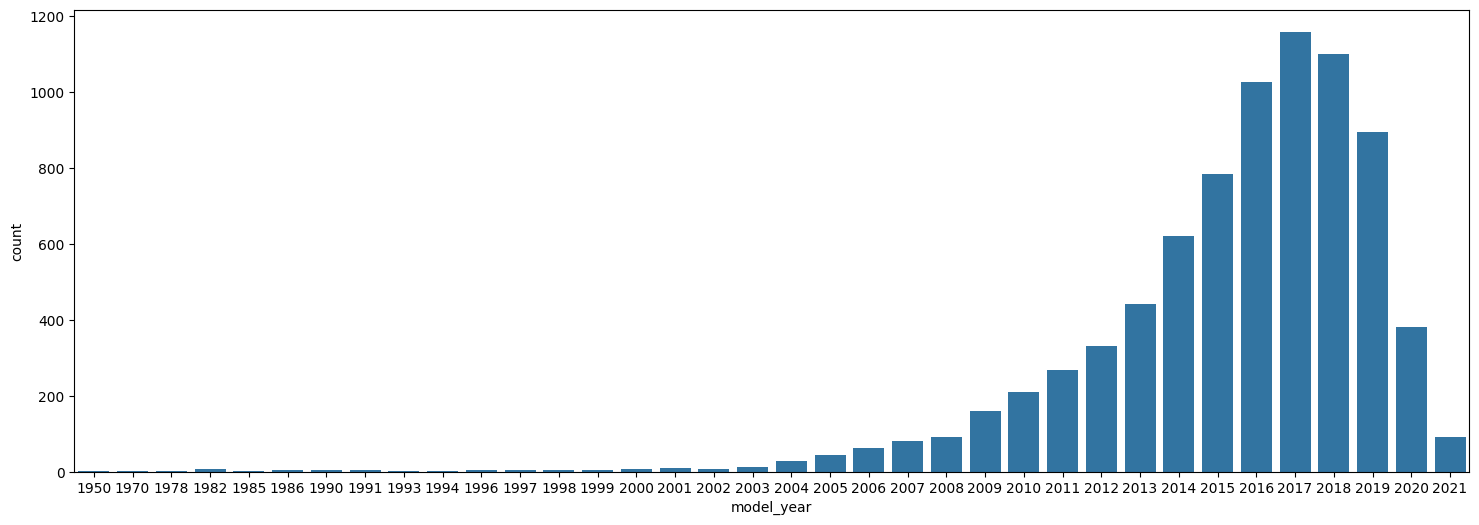

In [390]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x="model_year", data=bikes, ax=ax);

In [391]:
bikes["owner"].value_counts()

owner
1    6817
2     833
3     134
4      73
Name: count, dtype: int64

In [392]:
bikes

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,1,hyderabad,35.0,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,1,hyderabad,35.0,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,1,hyderabad,30.0,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,1,pondicherry,28.0,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,1,bangalore,NaN,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,1,agra,42.0,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,1,delhi,80.0,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,1,bangalore,65.0,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,1,bangalore,57.0,11.80 bhp,49000


In [393]:
bikes.dtypes

model_name     object
model_year      int64
kms_driven     object
owner           int64
location       object
mileage       float64
power          object
price           int64
dtype: object

In [394]:
bikes

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,1,hyderabad,35.0,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,1,hyderabad,35.0,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,1,hyderabad,30.0,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,1,pondicherry,28.0,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,1,bangalore,NaN,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,1,agra,42.0,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,1,delhi,80.0,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,1,bangalore,65.0,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,1,bangalore,57.0,11.80 bhp,49000
